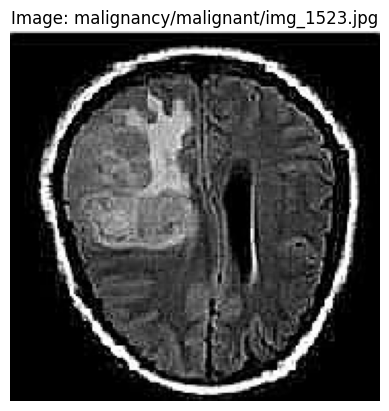

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: malignancy/malignant/img_1523.jpg, Predicted Class: yes, Confidence: 5.67


In [6]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Prompt the user for the image path
image_path = input("Enter the path to the image: ")
# Check if the image path exists
if not os.path.exists(image_path):
    print("The specified image path does not exist.")
    exit(1)
# Load the model
import tensorflow as tf
model_path = "saved_models/yes-no.keras"  # Update with your model path
reloaded = tf.keras.models.load_model(model_path)
# Define the image size
img_height, img_width = 180, 180
# Define the class names
class_names = ["no", "yes"]


# Load and preprocess the image
img = load_img(image_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.figure()
plt.imshow(img)
plt.title(f"Image: {image_path}")
plt.axis("off")
plt.show()

# Predict the class
predictions = reloaded.predict(img_array)
predicted_exists = class_names[tf.argmax(predictions[0]).numpy()]
confidence = tf.reduce_max(predictions[0]).numpy()

# Print the result
print(f"Image: {image_path}, Predicted Class: {predicted_exists}, Confidence: {confidence:.2f}")